高斯映射

In [1]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [2]:
def cal(xy1, xy2):
    return math.pow((xy1[0] - xy2[0]),2) + math.pow(abs(xy1[1] - xy2[1]),2)

In [3]:
d=np.zeros((320,320))
mid = (160,160)
sigma = 100000
for i in range(320):
    for j in range(320):
        d[i][j] = math.exp(-(cal(mid,(i,j)))/sigma)

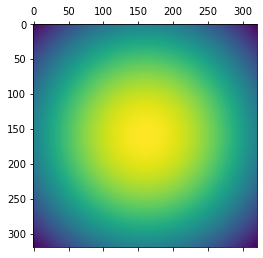

In [4]:
plt.matshow(d)

In [54]:
# Otsu's thresholding
ret2,th2 = cv2.threshold(a,0,2,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1529: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'


In [75]:
img = cv2.imread(r'.\save_img\NanLuo\39.9406_116.403076_0.jpg',0)

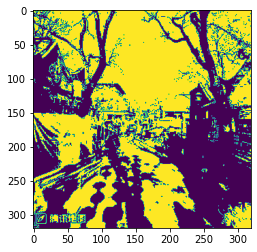

In [32]:
plt.imshow(th2)

In [27]:
img

array([[175, 100, 127, ..., 151, 151, 156],
       [141, 127, 187, ..., 140, 188, 151],
       [104, 163, 149, ..., 176, 152, 136],
       ...,
       [ 99,  94, 105, ..., 221, 220, 212],
       [123, 105,  95, ..., 202, 197, 185],
       [ 94, 118,  99, ..., 189, 181, 169]], dtype=uint8)

In [30]:
th2

array([[255,   0, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [  0, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [255,   0,   0, ..., 255, 255, 255],
       [  0, 255,   0, ..., 255, 255, 255]], dtype=uint8)

In [31]:
ret2

109.0

In [5]:
a = d*100

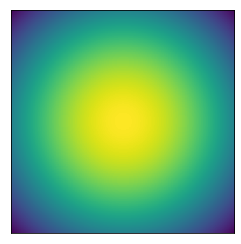

In [6]:
plt.matshow(a)
plt.xticks([])
plt.yticks([])
plt.savefig("3.jpg")

In [7]:
a = a.astype(np.int8) #赋值操作后a的数据类型变化

In [12]:
a.sum()/(a.shape[0]*a.shape[1])

84.293916015625

In [56]:
a

array([[59, 60, 60, ..., 60, 60, 60],
       [60, 60, 60, ..., 60, 60, 60],
       [60, 60, 60, ..., 60, 60, 60],
       ...,
       [60, 60, 60, ..., 61, 60, 60],
       [60, 60, 60, ..., 60, 60, 60],
       [60, 60, 60, ..., 60, 60, 60]], dtype=int8)

In [58]:
a[a<]

array([59, 60, 60, ..., 60, 60, 60], dtype=int8)

In [68]:
def OTSU(img):
    # 类间方差g初始最小
    g_raw = -1
    # 要返回的阈值
    T_return = 0
    # 获得图像大小
    M_N = img.shape[0]*img.shape[1]
    bigest = img.max()
    # 大津阈值算法
    for T in range(bigest):
        # 获取阈值大于T和小于T的两个列表
        array1 = img[img<T]
        array2 = img[img>T]
        # 算出w1和w2
        w1 = len(array1)/M_N
        w2 = len(array2)/M_N
        # 算出μ1和μ2
        if len(array1) == 0:
            mu1 = 0
        else:
            mu1 = sum(array1)/len(array1)
        if len(array2) == 0:
            mu2 = 0
        else:
            mu2 = sum(array2)/len(array2)
        # 算出g
        g=w1*w2*math.pow((mu1-mu2),2)
        if g > g_raw:
            g_raw = g
            T_return = T
    return T_return

In [69]:
OTSU(a)

84

In [61]:
a.max()

100

In [14]:
b = a

In [15]:
b[b<84] = 0

In [16]:
b[b>=84] = 1

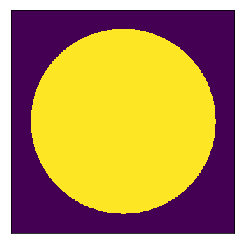

In [17]:
plt.matshow(b)
plt.xticks([])
plt.yticks([])
plt.savefig("4.jpg")

In [74]:
b

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [99]:
img = cv2.imread(r'.\save_img\NanLuo\39.9406_116.403076_0.jpg',0)
#img = img*b

In [100]:
from PIL import Image
im = Image.open(r'.\save_img\NanLuo\39.9406_116.403076_0.jpg')

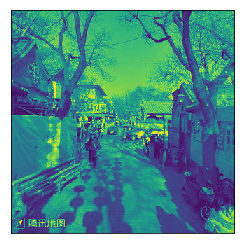

In [108]:
plt.matshow(img)
plt.xticks([])
plt.yticks([])

plt.savefig("1.jpg")

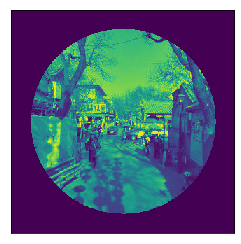

In [109]:
plt.matshow(img*b)
plt.xticks([])
plt.yticks([])
plt.savefig("2.jpg")

In [92]:
c = c.reshape(320,320,3)

In [89]:
c = np.array([b,b,b])
c

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)

In [79]:
cv2.imshow("Image", img)   
cv2.waitKey (0)  

-1

In [81]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)